In [1]:
%run scrap_leis.py

In [78]:
import pandas as pd
from pprint import pprint
from collections import Counter
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# exemplo de o que é extraído atualmente
pprint(tagged_ps[74])

{'cleaned_texto': 'Art. 14. A Carteira Profissional será processada nos têrmos '
                  'fixados no presente Capítulo e emitida pelas Delegacias '
                  'Regionais do Ministério do Trabalho e Previdência Social, '
                  'ou pelos órgãos federais, estaduais ou autarquias, '
                  'devidamente autorizados, sob o contrôle do Departamento '
                  'Nacional de Mão-de-Obra que expedirá as instruções '
                  'necessárias. (Redação dada pelo Decreto-Lei nº 229, de '
                  '1967)',
 'is_old': True,
 'links': [{'href': 'http://www.planalto.gov.br/ccivil_03/decreto-lei/Del0229.htm#art14',
            'texto': '(Redação dada pelo Decreto-Lei nº 229, de 1967)',
            'tipo': 'decreto',
            'tipo_id': '229'}],
 'p': <p align="justify" style="text-indent: 35px; margin-top: 0; margin-bottom: 0">
<font face="Arial" size="2"><a name="art14"></a><strike>Art. 14. A
Carteira Profissional será processada nos têr

# As normas que mais alterara a CLT

In [63]:
titulo_atual = None

all_links = []

for tagged_p in tagged_ps:
    
    if tagged_p["tag"] == "titulo":
        
        titulo_atual = tagged_p["cleaned_texto"]
        
    if tagged_p["links"]:
        
        links_texto = [{"tipo": link["tipo"].lower(), 
                        "id": link["tipo_id"].lower(),
                        "titulo": titulo_atual} for link in tagged_p["links"] if link["tipo_id"]]

        all_links.extend(links_texto)


df = pd.DataFrame(all_links)
df["titulo"] = df.titulo.astype("category", categories=["TÍTULO I",
                                                        "TÍTULO II",
                                                        "TÍTULO III",
                                                        "TÍTULO IV",
                                                        "TÍTULO V",
                                                        "TÍTULO VI",
                                                        "TÍTULO VI-A (incluído pela Lei nº 9.958, de 12.1.2000)",
                                                        "TÍTULO VII",
                                                        "TÍTULO VII-A (Incluído  pela Lei nº 12.440, de 2011)",
                                                        "TÍTULO VIII",
                                                        "TÍTULO IX",
                                                        "TÍTULO X",
                                                        "TÍTULO XI",], ordered=True)

#### quantidade

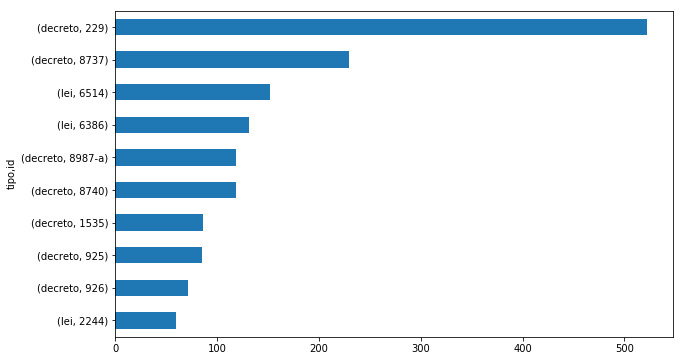

In [65]:
df.groupby(["tipo", "id"]).size().nlargest(10).sort_values(ascending=True).plot(kind="barh", figsize=(10, 6))

#### proporção por título

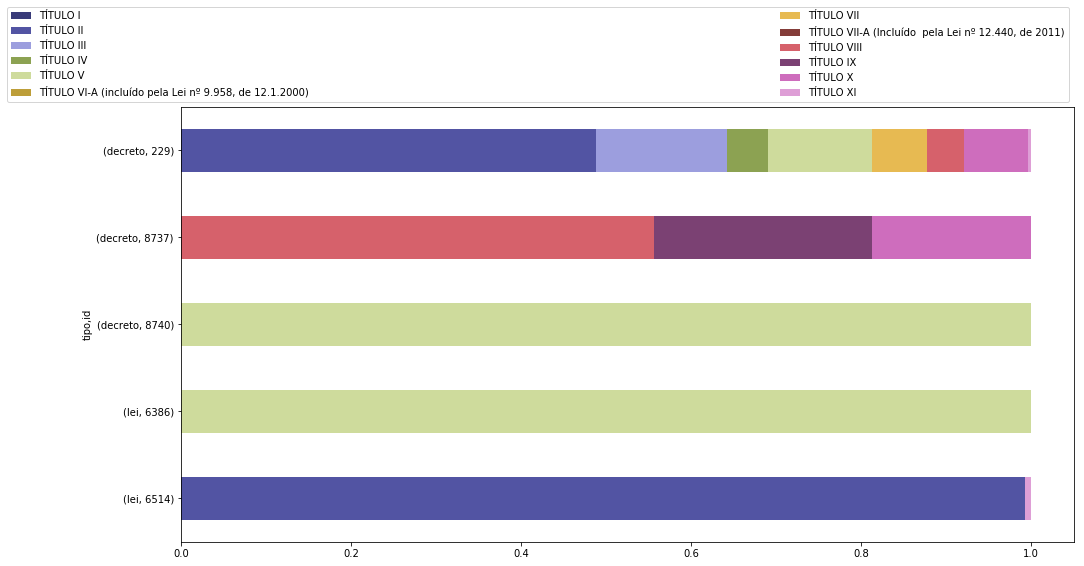

In [117]:
g = df.groupby(["tipo", "id", "titulo"]).size().unstack()
g10 = g.loc[g.sum(axis=1).nlargest(5).index, :]

gg10 = g10.div(g10.sum(axis=1), axis=0)

gg10.sort_index(ascending=False).plot(kind='barh', figsize=(16, 8), stacked=True, cmap=plt.cm.Vega20b)
plt.legend(bbox_to_anchor = (-.2, 1., 1.2, 0), ncol = 2, mode = "expand")

# Títulos mais alterados na CLT

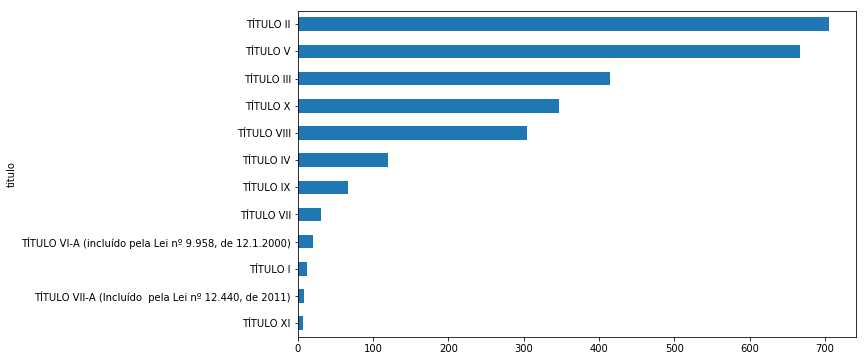

In [86]:
g = df.groupby(["titulo", "tipo"]).size().unstack().fillna(0)

g.sum(axis=1).sort_values(ascending=True).plot(kind="barh", figsize=(10, 6))

#### proporção por tipo de alteração

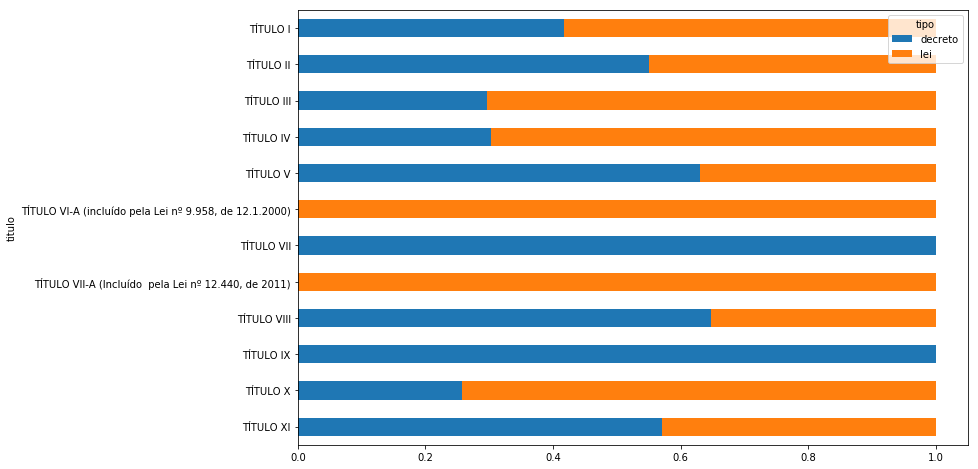

In [88]:
gg = g.div(g.sum(axis=1), axis=0)

gg.sort_index(ascending=False).plot(kind='barh', figsize=(12, 8), stacked=True)